In [1]:
# Melchizedek De Castro | CSC 59866 | Yunhua Zhang | Assignment 1

In [2]:
# Part A: Model Code

In [3]:
# 1. Write a function to calculate and return the Euclidean distance of two vectors. 
import numpy as np

def euclidean_distance(vector1, vector2):
  # check if input vectors have the same length
  if len(vector1) != len(vector2):
    raise ValueError("Vectors must be the same length")
  
  # convert vectors into numpy arrays.
  array_vector1 = np.array(vector1)
  array_vector2 = np.array(vector2)

  # subtract the 2 arrays to get the array difference.
  array_difference = array_vector1 - array_vector2

  # square the array difference to ensure positive elements
  # and to magnify scale
  squared_array_difference = array_difference**2
  
  # calculate the euclidean distance
  distance = np.sqrt(np.sum(squared_array_difference))
  return distance

v1 = [3, 1]
v2 = [1, 5]
v3 = [3, 5, 7, 9]

try:
  distance = euclidean_distance(v1, v2)
  print("euclidean_distance = ", distance)
except ValueError as e:
  print(e)

euclidean_distance =  4.47213595499958


In [4]:
# 2. Write a function to calculate and return the Manhattan distance of two vectors
import numpy as np

def manhattan_distance(vector1, vector2):
  # check if input vectors have the same length
  if len(vector1) != len(vector2):
    raise ValueError("Vectors must be the same length")
  
  # convert vectors into numpy arrays.
  array_vector1 = np.array(vector1)
  array_vector2 = np.array(vector2)

  # subtract the 2 arrays to get the array difference.
  array_difference = array_vector1 - array_vector2

  # absolute the array difference value to ensure positive result
  abs_array_difference = np.abs(array_difference)

  # calculate the manhattan distance
  distance = np.sum(abs_array_difference)
  return distance

v1 = [1, 3, 5]
v2 = [2, 4, 6]
v3 = [3, 5, 7, 9]

try:
  distance = manhattan_distance(v1, v2)
  print("manhattan_distance = ", distance)
except ValueError as e:
  print(e)

manhattan_distance =  3


In [5]:
# 3. Write a function to calculate and return the accuracy and generalization error of two vectors.
import numpy as np

def acc_gen_error(v1, v2):
    # check if input vectors have the same length
    if len(v1) != len(v2):
        raise ValueError("Vectors must be the same length")
    # print(v1)
    # print(v2)
    
    # calculate the accuracy
    accuracy = np.sum(v1 == v2) / len(v1)

    # calculate the general error of the 2 vectors
    gen_error = 1 - accuracy

    return accuracy, gen_error

v1 = np.array([0, 2, 1, 3, 4, 7])
v2 = np.array([0, 2, 1, 3, 4, 3])

try:
    accuracy, gen_error = acc_gen_error(v1, v2)
    print("Accuracy:", accuracy)
    print("Generalization Error:", gen_error)
except ValueError as e:
    print(e)

Accuracy: 0.8333333333333334
Generalization Error: 0.16666666666666663


In [6]:
# 4. Write three functions to compute: precision, recall and F1 score. 
import numpy as np

def get_tp_fp_fn(y_true, y_pred):
  tp = np.sum((y_true == 1) & (y_pred == 1))
  fp = np.sum((y_true == 0) & (y_pred == 1))
  fn = np.sum((y_true == 1) & (y_pred == 0))
  # print("tp=",tp) # 1 1
  # print("fp=",fp) # 0 1
  # print("fn=",fn) # 1 0

  return tp, fp, fn

def precision(y_true, y_pred):
  # check if input vectors have the same length
  if len(y_true) != len(y_pred):
      raise ValueError("Vectors must be the same length")
  
  tp, fp, fn = get_tp_fp_fn(y_true, y_pred)
  if (tp + fp == 0):
    return 0.0

  return tp / (tp + fp)

def recall(y_true, y_pred):
  if len(v1) != len(v2):
      raise ValueError("Vectors must be the same length")
  
  tp, fp, fn = get_tp_fp_fn(y_true, y_pred)
  if (tp + fn == 0):
    return 0.0

  return tp / (tp + fn)

def f1_score(y_true, y_pred):
  if len(v1) != len(v2):
      raise ValueError("Vectors must be the same length")

  tp, fp, fn = get_tp_fp_fn(y_true, y_pred)

  # F1 is by default calculated as 0.0 when there are no tp, fp, or fn.
  if (tp == 0 or fp == 0 or fn == 0):
     return 0.0
  
  precision_value = precision(y_true, y_pred)
  recall_value = recall(y_true, y_pred)

  # f1 = (2 * tp) / (2 * tp + fp + fn)
  f1 = 2 * (precision_value * recall_value) / (precision_value + recall_value)

  return f1

y_true = np.array([0, 0, 1, 0, 1, 1])
y_pred = np.array([0, 1, 0, 0, 0, 0])

# print("tp=",tp) # 1 1
# print("fp=",fp) # 0 1
# print("fn=",fn) # 1 0

try:
    print("Precision:", precision(y_true, y_pred))
    print("Recall:", recall(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

except ValueError as e:
    print(e)

Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [7]:
# 5. Write a function to compute the confusion matrix of two vectors.
import numpy as np

def my_confusion_matrix(v1, v2):
  
  if len(v1) != len(v2):
    raise ValueError("Vectors must be the same length")
  
  # print('v1:', v1)
  # print('v2:', v2)

  # concatenate the 2 vectors and return the unique elements in asc order
  classes = np.unique(np.concatenate((v1, v2)))

  # initialize a square matrix of num_classes by num_classes size
  num_classes = len(classes)
  matrix = np.zeros((num_classes, num_classes), dtype=type(classes[0]))

  # updates the confusion matrix
  for i in range(len(v1)):
      true_class = np.where(classes == v1[i])[0][0]
      pred_class = np.where(classes == v2[i])[0][0]

      matrix[true_class][pred_class] += 1

  return matrix

v1 = [2, 0, 2, 2, 0, 1]
v2 = [0, 0, 2, 2, 0, 2]

try:
  matrix = my_confusion_matrix(np.array(v1), np.array(v2))
  print("Confusion Matrix:")
  print(matrix)
except ValueError as e:
    print(e)


Confusion Matrix:
[[2 0 0]
 [0 0 1]
 [1 0 2]]


In [8]:
# 6. Write a function to generate the Receiver Operating Characteristic (ROC) curve. 
import numpy as np

def my_roc_curve(y_true, y_score):
    # ensure y_true is binary (0 or 1)
    classes = np.unique(y_true)
    if len(classes) > 2 or not np.array_equal(classes, [0, 1]):
        raise ValueError("Only binary classification is supported")

    # sort y_true by y_score in descending order
    desc_score_indices = np.argsort(y_score)[::-1]
    y_score_sorted = y_score[desc_score_indices]
    y_true_sorted = y_true[desc_score_indices]

    # initialize arrays for true positive rate (TPR) and false positive rate (FPR)
    tpr = []
    fpr = []

    # count the number of positive and negative instances
    num_pos = np.sum(y_true == 1)
    num_neg = np.sum(y_true == 0)

    # compute TPR and FPR at each threshold
    tp_count = 0
    fp_count = 0
    for score, label in zip(y_score_sorted, y_true_sorted):
        if label == 1:
            tp_count += 1
        else:
            fp_count += 1
        tpr.append(tp_count / num_pos)
        fpr.append(fp_count / num_neg)

    # add (0, 0) and (1, 1) to the ROC curve
    tpr = np.concatenate([[0], tpr, [1]])
    fpr = np.concatenate([[0], fpr, [1]])

    return fpr, tpr

y_true = np.array([0, 0, 1, 1])
y_score = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr = my_roc_curve(y_true, y_score)
print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR):", tpr)

False Positive Rate (FPR): [0.  0.  0.5 0.5 1.  1. ]
True Positive Rate (TPR): [0.  0.5 0.5 1.  1.  1. ]


In [9]:
# 7. Write a function to compute area under curve (AUC) for the ROC curve. 
import numpy as np

def auc(y_true, y_score):
    # get the indices to sort y_score in desc order
    order = np.argsort(y_score)[::-1]
    # apply the order to y_true & y_score
    y_true = y_true[order]
    y_score = y_score[order]

    n = len(y_true)
    # counts number of positive elements in y_true that are 1
    n_pos = np.sum(y_true == 1)
    # gets the number of negative elements
    n_neg = n - n_pos

    # fill tpr & fpr arrays with zeros
    tpr = np.zeros(n)
    fpr = np.zeros(n)

    tp = 0
    fp = 0
    # calculate the tpr and fpr
    for i in range(n):
        if y_true[i] == 1:
            tp += 1
        else:
            fp += 1
        tpr[i] = tp / n_pos
        fpr[i] = fp / n_neg

    # calcualte the area under ROC curve using the trapezoidal rule
    auc = np.trapz(tpr, fpr)

    return auc

y_true = np.array([1, 1, 2, 2])
y_score = np.array([0.1, 0.4, 0.35, 0.8])

auc_score = auc(y_true, y_score)
print("Area Under Curve:", auc_score)



Area Under Curve: 0.25


In [10]:
# 8. Write a function to generate the precision-recall curve. 
import numpy as np

def my_recall_curve(y_true, probas_pred):
    # get the indices to sort probas_pred in desc order
    desc_score_indices = np.argsort(probas_pred)[::-1]
    # apply the order to y_true
    y_true = y_true[desc_score_indices]
    # sort by descending order of probabilities
    probas_pred = probas_pred[desc_score_indices]

    # initialize variables
    precision = []
    recall = []
    thresholds = []
    tp = 0
    fp = 0
    fn = np.sum(y_true == 1)

    # compute precision-recall pairs for different thresholds
    for i in range(len(probas_pred)):
        if i > 0 and probas_pred[i] != probas_pred[i - 1]:
            precision.append(tp / (tp + fp))
            recall.append(tp / (tp + fn))
            thresholds.append(probas_pred[i - 1])

        if y_true[i] == 1:
            tp += 1
            fn -= 1
        else:
            fp += 1

    # add last precision-recall pair
    precision.append(tp / (tp + fp))
    recall.append(tp / (tp + fn))
    thresholds.append(probas_pred[-1])

    return np.array(precision), np.array(recall), np.array(thresholds)

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

precisions, recalls, thresholds = my_recall_curve(y_true, y_scores)
print(precisions)
print(recalls)
print(thresholds)

[1.         0.5        0.66666667 0.5       ]
[0.5 0.5 1.  1. ]
[0.8  0.4  0.35 0.1 ]


In [11]:
# 9. Implement a KNN_Classifier model class. It should have the following three methods. 
import numpy as np
from fractions import Fraction

# def to_rational(numbers):
#     return [float(Fraction(num).limit_denominator()) for num in numbers]

class KNN_Classifier:
    def fit(self, X, Y, n_neighbors, weights='uniform', **kwargs):
        self.X_train = X  # numpy array with rows representing data samples and columns representing features
        self.Y_train = Y  # 1D numpy array with labels corresponding to each row of the feature matrix X
        self.n_neighbors = n_neighbors  # number of nearest neighbors
        self.weights = weights  # used in prediction. Possible values are 'uniform' and 'distance'. default is 'uniform'
        self.kwargs = kwargs  # dictionary of arguments to be passed to the distance function

    def predict(self, X):
        if self.weights == 'uniform':
            weights_func = lambda distances: np.ones_like(distances)
        elif self.weights == 'distance':
            weights_func = lambda distances: 1 / (distances + 1e-6)
        elif self.weights == 'inverse_distance':
            weights_func = lambda distances: 1 / (distances + 1e-6)**2
        else:
            raise ValueError("Invalid value for 'weights'. Possible values are 'uniform', 'distance', and 'inverse_distance'.")
        Y_pred = []
        for x in X:
            # calculate distances to all training samples
            # distances = np.linalg.norm(self.X_train - x, axis=1, **self.kwargs)
            distances = np.linalg.norm(self.X_train - x.reshape(1, -1), axis=1, **self.kwargs)

            # get indices of the k nearest neighbors
            nearest_indices = np.argsort(distances)[:self.n_neighbors]

            # get labels of the k nearest neighbors
            nearest_labels = self.Y_train[nearest_indices]

            # calculate weights for the nearest neighbors
            w = weights_func(distances[nearest_indices])

            # predict the label for the current sample
            y_pred = np.argmax(np.bincount(nearest_labels, weights=w))
            Y_pred.append(y_pred)

        return np.array(Y_pred)[:, np.newaxis]
        # return np.array(Y_pred)

X = np.array([[0], [1], [2], [3]])
y = np.array([0, 0, 1, 1])
X_test = np.array([[1.1]])

knn = KNN_Classifier()
knn.fit(X, y, n_neighbors=5, weights='distance')
Y_pred = knn.predict(X_test)
print(Y_pred)


[[0]]


In [12]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [13]:
# Part B: Data Processing 

In [14]:
# 10. Read in the winequality-white.csv file as a Pandas data frame. 
import pandas as pd

file_path = '../winequality-white.csv'
# read csv file
df = pd.read_csv(file_path)

print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [15]:
# 11. 
"""
rating of wine and ranges  from 3 to 8
convert it into a two-category variable consisting of 'good' & 'bad'
good: quality > 5
bad: quality <= 5
target vector should have 0s (representing “bad”  quality wine), and 1s (representing “good” quality wine)
"""
# convert the "quality" column into a two-category variable
df['target'] = df['quality'].apply(lambda feat_matrix: 1 if feat_matrix > 5 else 0)

print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  target  
0      8.8        6       1  
1      9.5        6       

In [16]:
# 12. Use the techniques from the first recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles.
# Include this in your report. 

# generate summary statistics
summary_stats = df.describe()

print(summary_stats)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [17]:
# 13. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names. 
df_shuffled = df.sample(frac=1)

print(df_shuffled.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1238            7.1              0.44         0.37             2.7      0.041   
1840            6.9              0.18         0.33             1.0      0.054   
4348            7.6              0.31         0.52            13.2      0.042   
3502            6.7              0.29         0.45            14.3      0.054   
1397            7.3              0.25         0.36            13.1      0.050   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1238                 35.0                 128.0  0.98960  3.07       0.43   
1840                 24.0                 164.0  0.99260  3.42       0.51   
4348                 61.0                 148.0  0.99839  2.98       0.47   
3502                 30.0                 181.0  0.99869  3.14       0.57   
1397                 35.0                 200.0  0.99860  3.04       0.46   

      alcohol  quality  target  
1238     13.5    

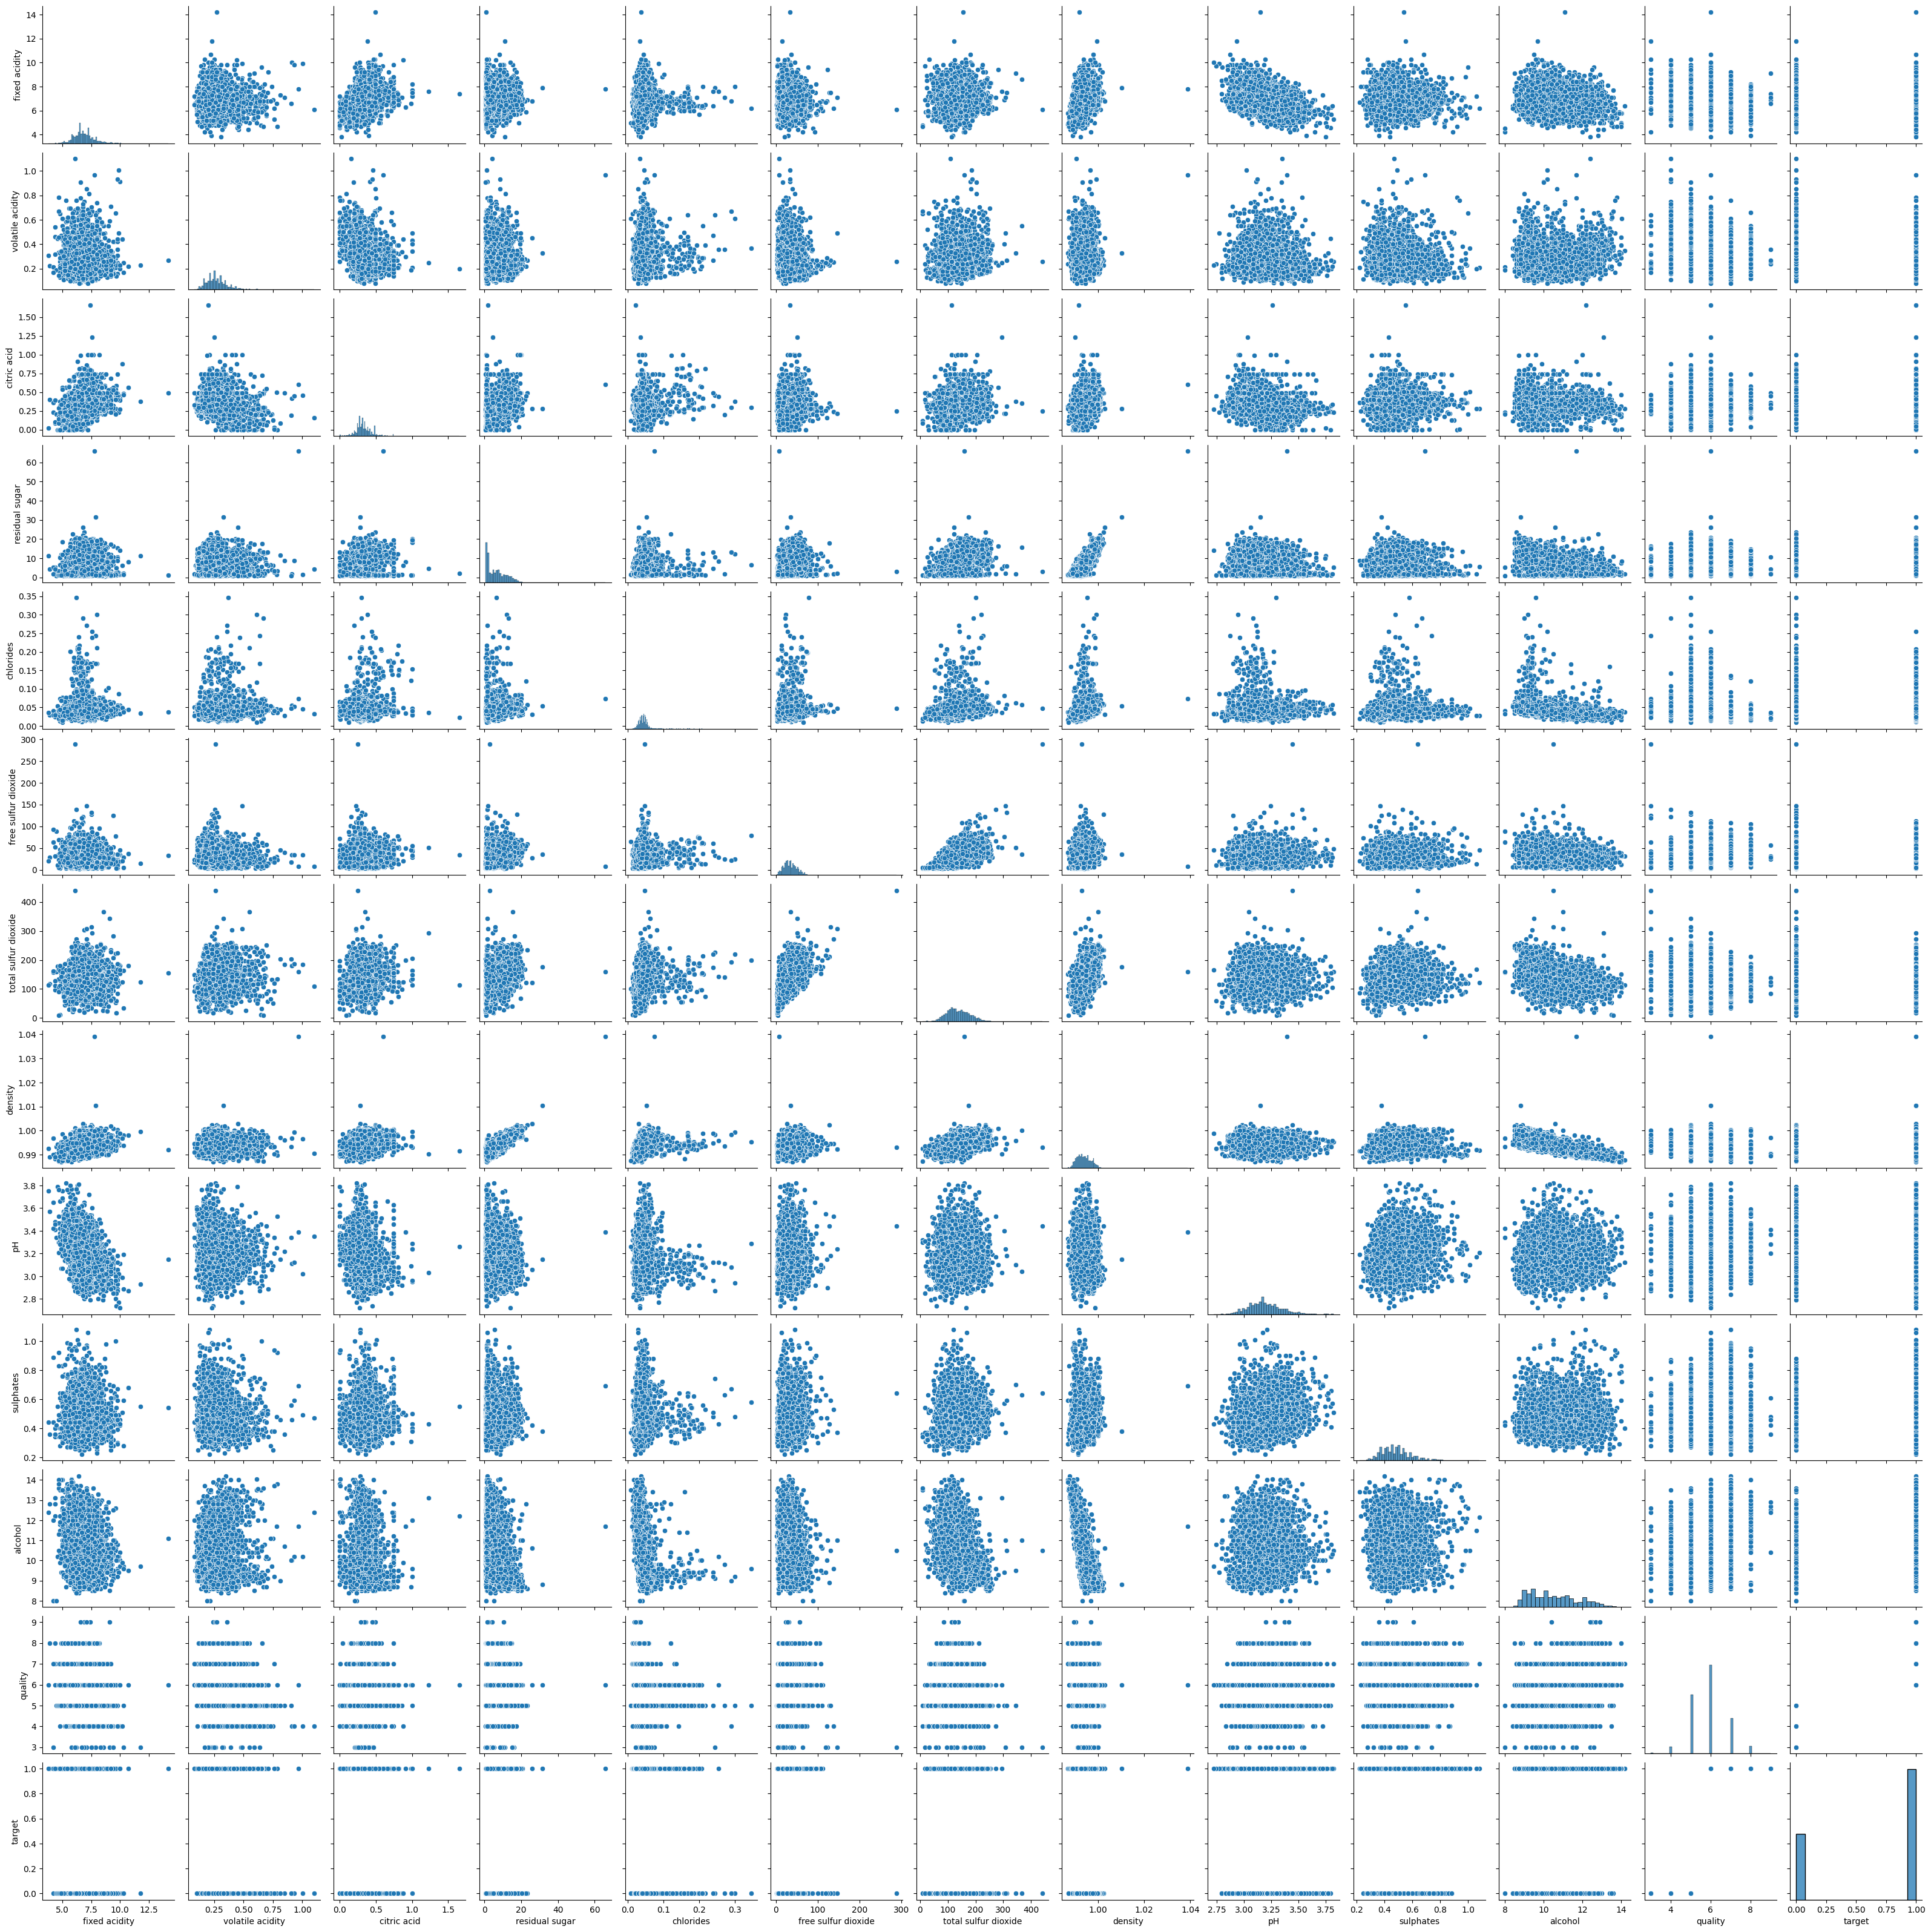

In [18]:
# 14. Generate pair plots using the seaborn package. This will be used to identify and report the redundant features, if there is any. 
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_shuffled)
plt.show()

In [19]:
# 15. Drop the redundant features.
# volatile acidity and sulphates seem redundant
redundant_features = ['volatile acidity', 'sulphates']
df_shuffled = df_shuffled.drop(redundant_features, axis=1)

print(f'Dropped features: {redundant_features}')
print(df.head())

Dropped features: ['volatile acidity', 'sulphates']
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  target  
0   

In [20]:
# 16. Write a function named “partition” to split your data into training and test set.
"""
The function should take 3 arguments:
  • feature matrix (numpy array with rows representing data samples and columns 
  representing features.),
  • target vector (numpy array with labels corresponding to each row of the feature matrix),
  • partition_size where partition_size is a real number to determine the size of partition. For example, if partition_size is set to 
  0.2, then 80% of the data will be used for training and 20% for testing.
  
This function should return two feature matrices for training and test data, and two 
target vectors for training and test data. 
"""

import numpy as np

def partition(feat_matrix, target_vector, partition_size):
    """
    Split the data into training and test sets.

    Parameters:
    - feat_matrix: Feature matrix (numpy array).
    - target_vector: Target vector (numpy array).
    - partition_size: Ratio for splitting the data (float).

    Returns:
    - fmatrix_train: Feature matrix for training data.
    - fmatrix_test: Feature matrix for test data.
    - tvector_train: Target vector for training data.
    - tvector_test: Target vector for test data.
    """
    n_samples = feat_matrix.shape[0]
    split_idx = int(n_samples * partition_size)

    fmatrix_train, fmatrix_test = feat_matrix[:split_idx], feat_matrix[split_idx:]
    tvector_train, tvector_test = target_vector[:split_idx], target_vector[split_idx:]

    return fmatrix_train, fmatrix_test, tvector_train, tvector_test

# feat_matrix = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
# target_vector = np.array([0, 1, 0, 1, 0])
feat_matrix = df_shuffled.drop(columns=['quality']).values
target_vector = df_shuffled['quality'].values

fmatrix_train, fmatrix_test, tvector_train, tvector_test = partition(feat_matrix, target_vector, 0.25)

print("fmatrix_train")
print(fmatrix_train)
print("fmatrix_test")
print(fmatrix_test)
print("tvector_train")
print(tvector_train)
print("tvector_test")
print(tvector_test)

fmatrix_train
[[ 7.1   0.37  2.7  ...  3.07 13.5   1.  ]
 [ 6.9   0.33  1.   ...  3.42 10.5   0.  ]
 [ 7.6   0.52 13.2  ...  2.98  9.1   1.  ]
 ...
 [ 8.5   0.41  4.3  ...  3.18  9.7   1.  ]
 [ 8.    0.3  17.45 ...  3.05  9.2   1.  ]
 [ 7.    0.28 10.6  ...  3.05 11.5   1.  ]]
fmatrix_test
[[ 7.1   0.28  1.9  ...  3.12 12.    0.  ]
 [ 6.5   0.31  1.7  ...  3.27 11.4   1.  ]
 [ 7.3   0.37  9.7  ...  3.48  9.9   1.  ]
 ...
 [ 9.2   0.34 10.5  ...  3.04 10.4   1.  ]
 [ 7.3   0.41 14.6  ...  3.16  9.4   1.  ]
 [ 7.9   0.39  1.   ...  3.08 11.9   0.  ]]
tvector_train
[7 5 6 ... 6 6 7]
tvector_test
[5 7 6 ... 6 6 5]


In [21]:
# 17. Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and using Euclidean distance. 
knn = KNN_Classifier()
knn.fit(fmatrix_train, tvector_train, n_neighbors=5, weights='distance')
Y_pred_naive = knn.predict(fmatrix_test)

print(Y_pred_naive)

[[6]
 [7]
 [5]
 ...
 [7]
 [6]
 [5]]


In [29]:
# 17a. Use accuracy and F1 score to compare your predictions to the expected labels.
acc, gen_error = acc_gen_error(fmatrix_test, Y_pred_naive)
f1 = f1_score(fmatrix_test, Y_pred_naive)

print(fmatrix_test)
print(Y_pred_naive)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

[[ 7.1   0.28  1.9  ...  3.12 12.    0.  ]
 [ 6.5   0.31  1.7  ...  3.27 11.4   1.  ]
 [ 7.3   0.37  9.7  ...  3.48  9.9   1.  ]
 ...
 [ 9.2   0.34 10.5  ...  3.04 10.4   1.  ]
 [ 7.3   0.41 14.6  ...  3.16  9.4   1.  ]
 [ 7.9   0.39  1.   ...  3.08 11.9   0.  ]]
[[6]
 [7]
 [5]
 ...
 [7]
 [6]
 [5]]
Accuracy: 0.8333333333333334
F1 Score: 0.0


In [23]:
# 17b. Now standardize each feature of your training set (subtract mean and divide by standard deviation). 
# Use the mean and standard deviation values for each feature in the training set to scale the test data.

# calculate mean and std deviation of each feature
mean_X = np.mean(fmatrix_train, axis=0)
std_X = np.std(fmatrix_train, axis=0)

# standardize training set
standardized_train = (fmatrix_train - mean_X) / std_X
# scale the test data using mean and std deviation values
standardized_test = (fmatrix_test - mean_X) / std_X

print("Standardized training set:")
print(standardized_train)
print("\nScaled test data:")
print(standardized_test)

Standardized training set:
[[ 0.30508242  0.32449789 -0.74517681 ... -0.77800806  2.47182926
   0.70840701]
 [ 0.06806504 -0.02095583 -1.07428227 ...  1.54592621  0.00645661
  -1.41161788]
 [ 0.89762588  1.61994937  1.28753337 ... -1.37559116 -1.14405063
   0.70840701]
 ...
 [ 1.96420409  0.66995162 -0.4354305  ... -0.04762872 -0.6509761
   0.70840701]
 [ 1.37166064 -0.28004613  2.11029702 ... -0.91080431 -1.06187154
   0.70840701]
 [ 0.18657373 -0.45277299  0.78419561 ... -0.91080431  0.82824749
   0.70840701]]

Scaled test data:
[[ 0.30508242 -0.45277299 -0.90004997 ... -0.44601745  1.23914293
  -1.41161788]
 [-0.40596972 -0.1936827  -0.93876826 ...  0.54995438  0.7460684
   0.70840701]
 [ 0.5420998   0.32449789  0.60996331 ...  1.94431495 -0.48661792
   0.70840701]
 ...
 [ 2.79376493  0.0654076   0.76483647 ... -0.97720243 -0.07572248
   0.70840701]
 [ 0.5420998   0.66995162  1.5585614  ... -0.18042496 -0.89751336
   0.70840701]
 [ 1.25315195  0.49722476 -1.07428227 ... -0.71160994 

In [24]:
# 17c. c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1 score with the expected labels.

# fit the model on the standardized training dataset
knn.fit(standardized_train, tvector_train, n_neighbors=5, weights='distance')
# predict labels for the standardized training dataset
Y_pred_train_standardized = knn.predict(standardized_test)

print(fmatrix_test)
print(Y_pred_train_standardized)

# calculate accuracy and F1 score
accuracy_standardized, standardized_gen_error = acc_gen_error(fmatrix_test, Y_pred_train_standardized)
f1_standardized = f1_score(fmatrix_test, Y_pred_train_standardized)

print("Accuracy (Standardized Data):", accuracy_standardized)
print("F1 Score (Standardized Data):", f1_standardized)

[[ 7.1   0.28  1.9  ...  3.12 12.    0.  ]
 [ 6.5   0.31  1.7  ...  3.27 11.4   1.  ]
 [ 7.3   0.37  9.7  ...  3.48  9.9   1.  ]
 ...
 [ 9.2   0.34 10.5  ...  3.04 10.4   1.  ]
 [ 7.3   0.41 14.6  ...  3.16  9.4   1.  ]
 [ 7.9   0.39  1.   ...  3.08 11.9   0.  ]]
[[5]
 [7]
 [6]
 ...
 [6]
 [6]
 [5]]
Accuracy (Standardized Data): 0.03592814371257485
F1 Score (Standardized Data): 0.0


In [25]:
# 17e. Perform a similar test for inverse distance weighting in the KNN_Classifier model and determine whether or not to use it. 

# fit the model on the standardized training dataset with inverse distance weighting
knn.fit(standardized_train, tvector_train, n_neighbors=5, weights='inverse_distance')
Y_pred_train_standardized_inverse = knn.predict(standardized_test)

# calculate accuracy and F1 score for inverse distance weighting
accuracy_standardized_inverse = acc_gen_error(fmatrix_test, Y_pred_train_standardized_inverse)
f1_standardized_inverse = f1_score(fmatrix_test, Y_pred_train_standardized_inverse)

print("Accuracy (Standardized Data with Inverse Distance Weighting):", accuracy_standardized_inverse)
print("F1 Score (Standardized Data with Inverse Distance Weighting):", f1_standardized_inverse)

Accuracy (Standardized Data with Inverse Distance Weighting): (0.037016875340228635, 0.9629831246597713)
F1 Score (Standardized Data with Inverse Distance Weighting): 0.0


In [26]:
# Part C: Model Evaluation

In [27]:
"""
18. evaluate the performance of your model over each combination of k and distance metrics from the following sets: 
i.  k=[1,5,9,11]
    distance = [Euclidean, Manhattan]
    weights = [uniform, distance] 
 """

# Define the combinations of k, distance metrics, and weights
k_values = [1, 5, 9, 11]
distance_metrics = ['euclidean', 'manhattan']
weights = ['uniform', 'distance']

for k in k_values:
    for distance in distance_metrics:
        for weight in weights:
            knn.fit(fmatrix_train, tvector_train, n_neighbors=k, weights=weight)
            predictions = knn.predict(fmatrix_test)
            
            prec = precision(fmatrix_test, predictions)
            rec = recall(fmatrix_test, predictions)
            f1 = f1_score(fmatrix_test, predictions)
            # cm = my_confusion_matrix(tvector_test, predictions)
            acc = acc_gen_error(fmatrix_test, predictions)
             
            print(f"k = {k}\t{distance}\t{weight}")
            print(f"Precision: {prec}")
            print(f"Recall: {rec}")
            print(f"F1 Score: {f1}")
            # print(f"Confusion Matrix:\n{cm}")
            print(f"Accuracy: {acc}")
            print("========================================================")

k = 1	euclidean	uniform
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: (0.0362003266194883, 0.9637996733805116)
k = 1	euclidean	distance
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: (0.0362003266194883, 0.9637996733805116)
k = 1	manhattan	uniform
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: (0.0362003266194883, 0.9637996733805116)
k = 1	manhattan	distance
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: (0.0362003266194883, 0.9637996733805116)
k = 5	euclidean	uniform
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: (0.03592814371257485, 0.9640718562874252)
k = 5	euclidean	distance
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: (0.038922155688622756, 0.9610778443113772)
k = 5	manhattan	uniform
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: (0.03592814371257485, 0.9640718562874252)
k = 5	manhattan	distance
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: (0.038922155688622756, 0.9610778443113772)
k = 9	euclidean	uniform
Precision: 0.0
Recall: 0.0
F1 Score: 0